In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

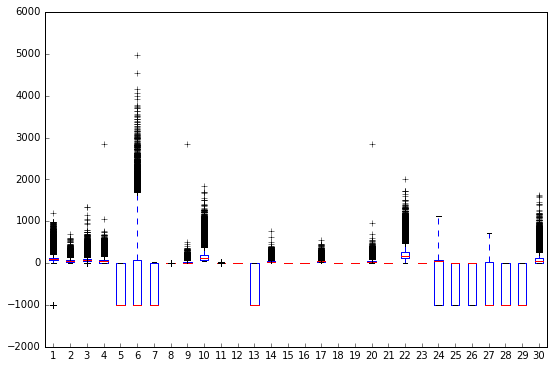

In [3]:
#Boxplot of the Raw Data
boxplot(tX, -2000, 6000, 'boxplot_original')

## Scatter plots

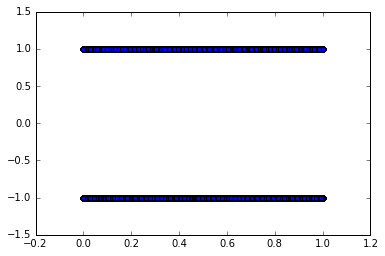

In [4]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [5]:
for i,col in zip(range(tX.T.shape[0]),tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    #print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


# Feature Processing

## Data scaling 

In [6]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

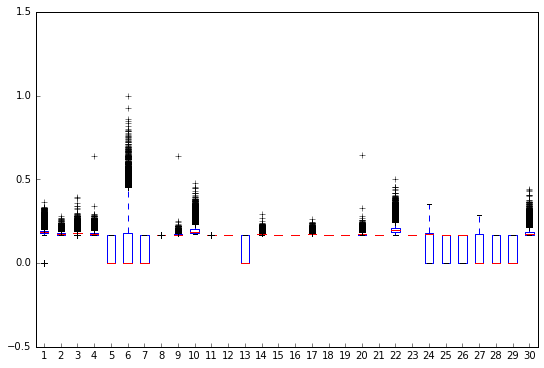

In [7]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [3]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

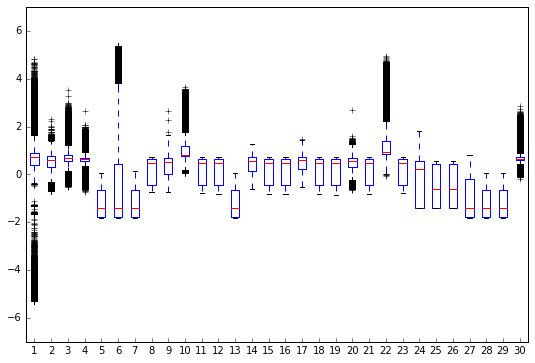

In [9]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Feature Deletion

In [34]:
PERCENT_FACTOR = 0.5
dele_tX_temp = deleteNoneWantedData(tX, PERCENT_FACTOR)
np_dele_tX_temp = np.array(dele_tX_temp)

conc = np.column_stack((y, np_dele_tX_temp))
conc_filtered = conc[~(conc == -999).any(1)]
y_cleaned = conc_filtered[:,0]
tX_cleaned = conc_filtered[:,1:]
#y_tX_temp = np.append(np.array([y]).T, dele_tX_temp, axis=1)
#dele_tX = deleteUnwantedLine(dele_tX_temp)

In [72]:
#dele_tX_temp[:10]
import sys
#print(y_cleaned.shape)
#print(tX_cleaned.shape)
corr_mat = np.corrcoef(rem_mean_tX.T)
rem_mean_tX = np.delete(mean_tX, [2, 4, 9, 16, 29], 1)
np.savetxt(sys.stdout, corr_mat, '%5.2f')

 1.00  0.18  0.02 -0.01  0.01  0.45  0.01  0.07  0.02 -0.02  0.25  0.00 -0.00  0.00 -0.00  0.09 -0.00  0.08  0.01  0.01  0.00  0.01 -0.01  0.00 -0.00
 0.18  1.00 -0.25 -0.07  0.07  0.04  0.02  0.35 -0.42 -0.06 -0.15 -0.00  0.00 -0.01  0.00  0.18 -0.02 -0.17 -0.21 -0.12  0.00  0.01 -0.02  0.00  0.00
 0.02 -0.25  1.00  0.12 -0.02 -0.54  0.31  0.09  0.54  0.01  0.41  0.00  0.01  0.01 -0.00  0.68  0.01  0.78  0.62  0.67  0.00  0.00  0.23  0.00 -0.01
-0.01 -0.07  0.12  1.00 -0.76 -0.06 -0.03 -0.04  0.07  0.48  0.08 -0.00  0.00 -0.00 -0.00  0.09  0.00  0.10 -0.02  0.22 -0.00  0.00  0.24 -0.00 -0.00
 0.01  0.07 -0.02 -0.76  1.00  0.01  0.08  0.04 -0.05 -0.56 -0.03  0.00  0.00  0.00  0.00  0.01  0.00  0.03  0.03 -0.02 -0.00 -0.00  0.00 -0.00  0.00
 0.45  0.04 -0.54 -0.06  0.01  1.00 -0.15  0.05 -0.21 -0.01 -0.20  0.00 -0.01  0.00 -0.00 -0.40 -0.00 -0.41 -0.35 -0.37 -0.00  0.01 -0.13  0.00  0.00
 0.01  0.02  0.31 -0.03  0.08 -0.15  1.00  0.04  0.18 -0.09  0.10  0.00  0.00  0.01 -0.00  0.27  0.0

## Replace Undefined variables by mean of all the other variables

In [7]:
mean_tX = np.array(averageData(tX))
#mean_std_tX = np.array(averageData(std_tX))

In [59]:
tX[1]

array([  1.60937000e+02,   6.87680000e+01,   1.03235000e+02,
         4.81460000e+01,   2.40373503e+00,   3.71783360e+02,
        -8.21688171e-01,   3.47300000e+00,   2.07800000e+00,
         1.25157000e+02,   8.79000000e-01,   1.41400000e+00,
         4.58289801e-01,   4.20140000e+01,   2.03900000e+00,
        -3.01100000e+00,   3.69180000e+01,   5.01000000e-01,
         1.03000000e-01,   4.47040000e+01,  -1.91600000e+00,
         1.64546000e+02,   1.00000000e+00,   4.62260000e+01,
         7.25000000e-01,   1.15800000e+00,   5.76794744e+01,
        -1.18452642e-02,  -1.58228913e-03,   4.62260000e+01])

## Polynomial Transformation

### Polynome

In [94]:
plop = np.array([[2, 3, 4],
          [1, 2, 3],
          [3, 2, 1]])
build_poly_matrix(plop, 2)

array([[  1.,   2.,   4.,   3.,   9.,   4.,  16.],
       [  1.,   1.,   1.,   2.,   4.,   3.,   9.],
       [  1.,   3.,   9.,   2.,   4.,   1.,   1.]])

### Squared

In [95]:
tx_squares = build_poly_matrix(mean_tX, 2)

### Sqrt

## Other Transformations

### Log

### Suppress some col

In [81]:
mean_sup = np.delete(mean_tX, [2, 4, 29], 1)
print(mean_sup.shape)

(250000, 27)


## Model Selection

### Least Squares

In [10]:
def compute_vif(X):
    VIF = []
    for j in range(X.shape[1]):
        col = X[:, j]
        inv_mat = np.linalg.inv(np.dot(X.T, X))
        vif_j = np.dot(col.T, col) * inv_mat[j, j]
        VIF.append(vif_j)
    return VIF

In [98]:
mse, weights = least_squares(y, tx_squares)
print(mse)
mse_m, w_m = least_squares(y, np.delete(mean_tX, [4, 9, 13, 29], 1))
print(compute_vif(rem_mean_tX))
remove_tX = np.delete(mean_tX, [4, 9, 13, 29], 1)
r_mse, w_r = least_squares(y, remove_tX)
print(r_mse)

0.315526948979
[11.212733680227732, 6.7807773783265333, 16.946584398070922, 11.615670260679567, 3.3933524619467419, 16.280280680251991, 2.3258913221371178, 9.0022889179960099, 1.9216543164444713, 7.3758320829766157, 9.8465702239617858, 1.4637329354400286, 1.0964948094796052, 1.4740655584577822, 1.1361297745622783, 8.906716833183312, 1.0621887591974193, 21.351656057072532, 5.8754183431276559, 13.154984715326412, 1.0739754796380323, 1.1628934210030091, 16.265181655524074, 1.0427653643167913, 1.0245864605127299]
0.351869823451


### Ridge Regression

In [10]:
w_ridge = ridge_regression(y, tx_squares, 10**(-5))
print(w_ridge)

[ -5.86890070e-02   4.07196948e-03  -6.58241648e-06  -5.83791767e-02
  -9.77922535e-03   2.90288316e-05  -5.84584890e-02  -9.23562762e-03
   1.01098216e-05  -5.85153310e-02   2.18103182e-03   8.93493258e-07
  -5.88322272e-02  -1.62945886e-01   2.21386560e-02  -5.28104855e-02
  -9.18738751e-05   4.31757764e-09  -5.72506576e-02  -3.70688369e-02
  -2.13184784e-03  -5.72175881e-02   8.00375757e-01  -9.68230775e-02
  -5.73167430e-02  -4.91352685e-04   1.40937089e-06  -5.75006470e-02
  -1.26310232e-03  -7.00769171e-07  -5.74835046e-02  -3.00438464e-01
   2.56565034e-02  -5.73505713e-02   4.51090546e-02   3.81245303e-02
  -5.74841704e-02  -8.32434911e-02   4.48114214e-01  -5.74804350e-02
   1.25084093e-02  -2.79625324e-05  -5.74837065e-02  -1.00687131e-03
  -2.29386394e-02  -5.74836137e-02   7.02441023e-05  -5.95019770e-04
  -5.74839251e-02   1.60638588e-02  -4.06999156e-05  -5.74836304e-02
  -7.35347305e-04  -3.53580396e-02  -5.74836304e-02   1.04716143e-03
  -1.60128168e-04  -5.74836304e-02

### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression (does not work)

In [86]:
from Methods.logistic import *
y_binary = np.copy(y)
y_binary[y_binary == -1] = 0
std_tX_temp = data_standardization(rem_mean_tX.T)
m, w = least_squares(y_binary, mean_std_tX)
w_log = logistic_regression_gradient_descent_demo(y_binary, std_tX_temp)

25 (25, 1)
Current iteration=0, the loss=173286.79514050332
Current iteration=5, the loss=163682.2508754188
Current iteration=10, the loss=161146.13129954087
Current iteration=15, the loss=160299.8320746825
Current iteration=20, the loss=159882.14641561502
Current iteration=25, the loss=159579.9822449243
Current iteration=30, the loss=159312.06169968503
Current iteration=35, the loss=159056.64407139446
Current iteration=40, the loss=158807.74795708733
Current iteration=45, the loss=158563.63926758376
Current iteration=50, the loss=158323.74448836307
Current iteration=55, the loss=158087.8137868092
Current iteration=60, the loss=157855.69233744926
Current iteration=65, the loss=157627.25718642768
Current iteration=70, the loss=157402.39936816544
Current iteration=75, the loss=157181.0184582304
Current iteration=80, the loss=156963.02058954953
Current iteration=85, the loss=156748.31747299354
Current iteration=90, the loss=156536.8257444742
Current iteration=95, the loss=156328.466447654

KeyboardInterrupt: 

### Reg logistic regression

## Verification

### Cross Validation

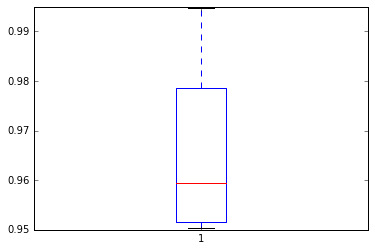

[0.95031784156670451, 0.95050302471901693, 0.95116770340460988, 0.95251246711001114, 0.95616734936934544, 0.96276269142504689, 0.97228802317008933, 0.9806773169600691, 0.98627379565716944, 0.99464164401054511]


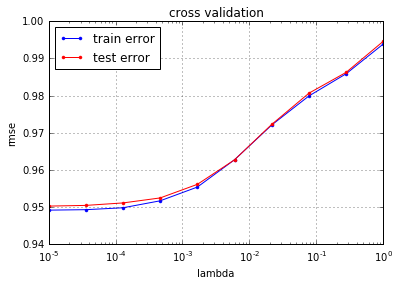

In [97]:
#Data split for the tests
#x_tr, y_tr, x_te, y_te = split_data(tX, y, 0.4)

cross_validation_demo(y, tx_squares)


###  Bias-Variance decomposition

### Binary Classification

In [ ]:
#Use predict_labels de project helpers (fait la multiplication entre tX et les w)

## Generate predictions and save ouput in csv format for submission:

In [99]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [100]:
mean_tX_test = np.array(averageData(tX_test))

In [101]:
tX_test_squares = build_poly_matrix(mean_tX_test, 2)

In [102]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_squares)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)